In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
opDict = {0:'kardus',1:'gelas',2:'metal',3:'kertas',4:'plastik',5:'sampah'}

In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 136ms/step


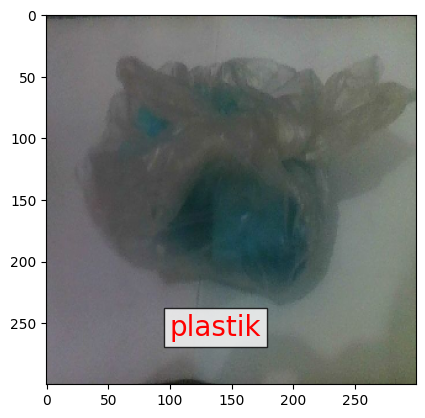

Ketepatan/Probabilitasnya:  0.34105328
Hasil lainnya sebagai berikut:

KARDUS : 9.71 %
GELAS : 28.55 %
METAL : 9.96 %
KERTAS : 8.6 %
PLASTIK : 34.11 %
SAMPAH : 9.08 %


In [6]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img = image.load_img(take_photo(), target_size = (300,300))
img = np.array(img)/255.0
plt.imshow(img)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
save = load_model("gdrive/MyDrive/Cobacoba/Garbage/model.h5")
hasil1 = save.predict(img)
result=list(hasil1[0])

img_index =result.index(max(result))
#print("benda ini berbahan: " + opDict[img_index])
plt.text(100, 260,opDict[img_index],color='red',fontsize=20,bbox=dict(facecolor='white',alpha=0.8))
plt.show()

print("Ketepatan/Probabilitasnya: ",np.max(hasil1[0], axis=-1))
print("Hasil lainnya sebagai berikut:\n")

classes = []
probability = []

for i,j in enumerate(hasil1[0],0):
  print(opDict[i].upper(),':',round(j*100,2),'%')